# Pie Chart

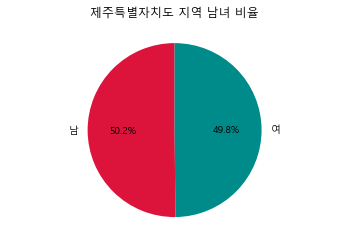

In [5]:
import csv
import matplotlib.pyplot as plt

##### font 깨짐 방지
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')
#####

f = open('data/gender.csv')
data = csv.reader(f)
size = []
name = input('where?')

for row in data:
    if name in row[0]:
        m = 0
        f = 0
        for i in range(101):
            m += int(row[i+3].replace(',', ''))
            f += int(row[i+106].replace(',', ''))
        break 
        # 파이차트를 그리는 경우, '제주도'를 name 지정시 값이 여러개일 때 멈추는 코드를 추가
size.append(m)
size.append(f)

# pie chart
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size, labels=['남', '여'], autopct='%.1f%%', colors=color, startangle=90)
plt.title(name+' 지역 남녀 비율')
plt.show()

# Scatter Graph 그리기

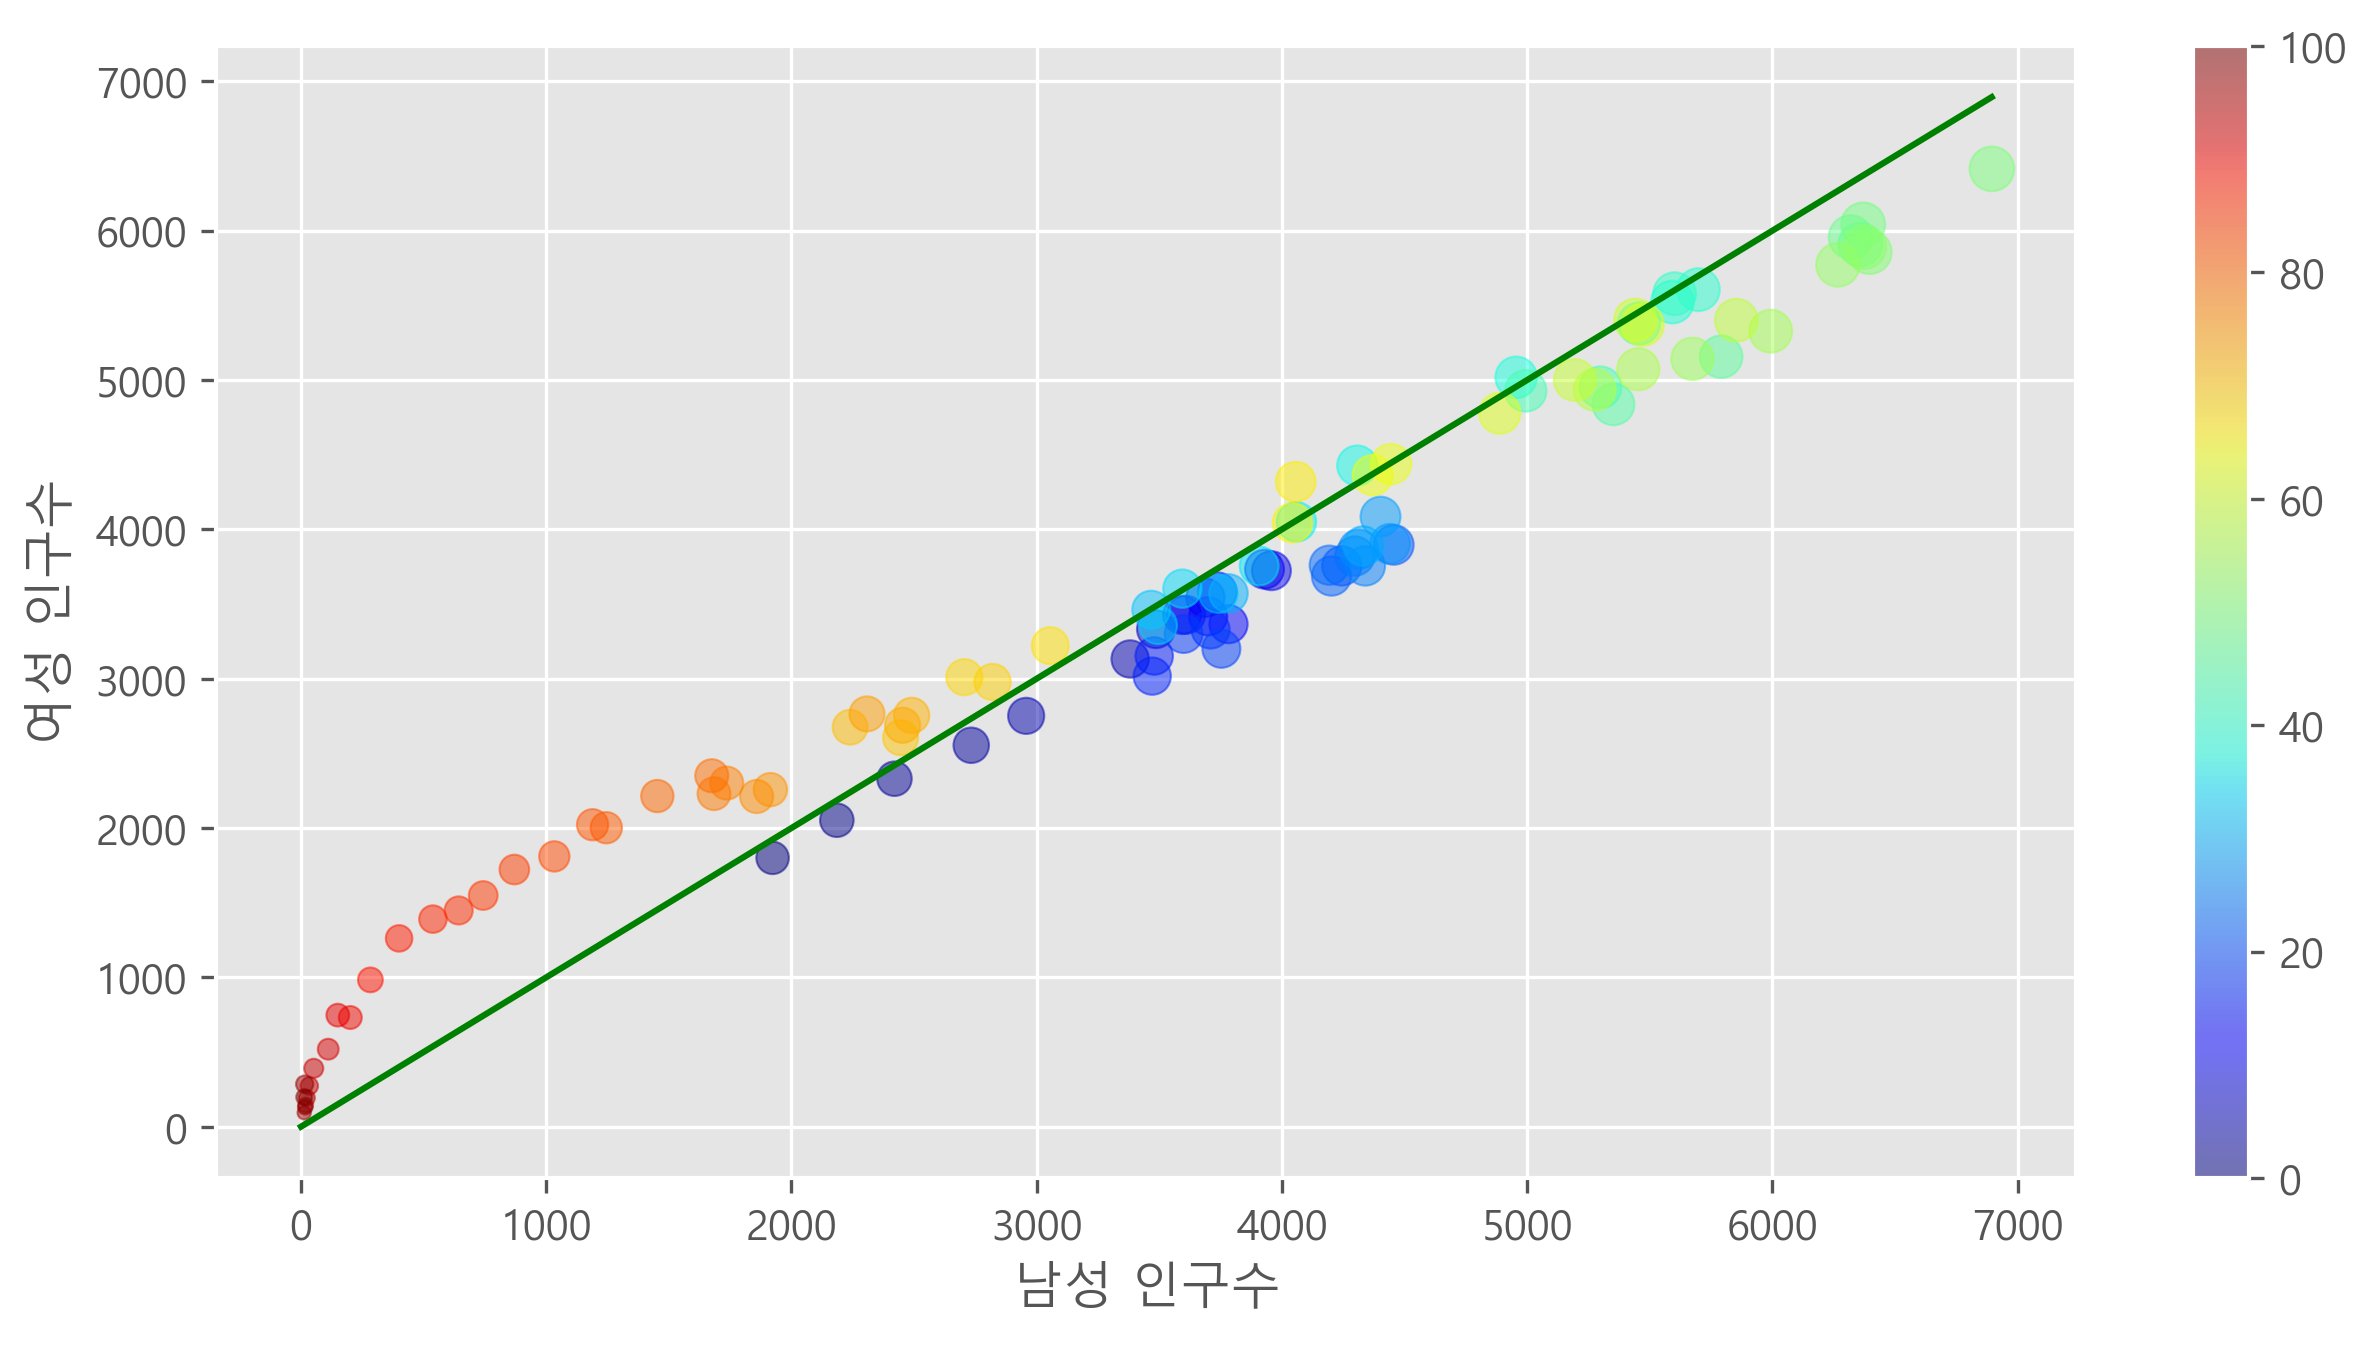

In [48]:
import csv
import math
import matplotlib.pyplot as plt

##### font 깨짐 방지
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')
#####

f = open('data/gender.csv')
data = csv.reader(f)
m = []
f = []
size = []
name = input('where?')

for row in data:
    if name in row[0]:
        for i in range(3, 104):
            m.append(int(row[i].replace(',', '')))
            f.append(int(row[i+103].replace(',', '')))
            size.append(math.sqrt(int(row[i].replace(',', '')) + int(row[i+103].replace(',', ''))))
        break

plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.scatter(m, f, s=size, c=range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(m)), range(max(m)), 'g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
# plt.savefig('img/scatter.png') # 이미지 파일 저장
plt.show()

## 지하철 유무임별 이용현황 데이터 정제하기

In [ ]:
import csv

f = open('data/subwayfee.csv', encoding='utf8')
data = csv.reader(f)
next(data)

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    print(row)

In [37]:
# 유임승차 / 무임승차 비율의 최댓값 찾기
import csv

f = open('data/subwayfee.csv', encoding='utf8')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0:
        rate = row[4] / row[6]
        if rate > mx:
            mx = rate
            print(row, round(rate, 2))

print(mx)

['Aug-21', '1호선', '1', '서울역', 792988, 756399, 145014, 136947] 5.47
['Aug-21', '1호선', '2', '시청', 393938, 389734, 55055, 53210] 7.16
['Aug-21', '2호선', '11', '시청', 432363, 416176, 38988, 35390] 11.09
['Aug-21', '2호선', '19', '한양대', 130467, 133476, 9609, 9422] 13.58
['Aug-21', '2호선', '49', '홍대입구', 1172536, 1201862, 75396, 71591] 15.55
['Aug-21', '3호선', '73', '충무로', 32, 0, 1, 0] 32.0
['Aug-21', '6호선', '445', '연신내', 34, 0, 1, 0] 34.0
34.0


In [44]:
import csv

f = open('data/subwayfee.csv', encoding='utf8')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4]+row[6])
        if rate > mx:
            mx = rate
            mx_station = row[3] + ' ' + row[1]

print(mx_station, round(mx*100, 2))

서울역 경부선 94.81


In [45]:
# 유무임 승하차 인원이 가장 많은 역 찾기
import csv

f = open('data/subwayfee.csv', encoding='utf8')
data = csv.reader(f)
next(data)
mx = [0]*4
mx_station = ['']*4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i] + ' : ' + mx_station[i], mx[i])

유임승차 : 강남 2호선 1740176
유임하차 : 강남 2호선 1700077
무임승차 : 종로3가 1호선 239745
무임하차 : 제기동 1호선 230294


In [ ]:
# 유무임 승하차 비율 파이차트로 그리기
import csv
import matplotlib.pyplot as plt

f = open('data/subwayfee.csv', encoding='utf8')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    plt.pie(row[4:8])
    plt.axis('equal')
    # plt.savefig(row[3]+ ' ' +row[1]+ ' .png') # 이미지 파일 저장
    # plt.show()

## 지하철 시간대별 이용 현황 데이터

In [ ]:
# 데이터 불러오기
import csv

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)

for row in data:
    row[4:] = map(int, row[4:])
    print(row)

In [54]:
# 아침 7시 승차 데이터
import csv

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

607
[31643, 5128, 5971, 5069, 3988, 4526, 12037, 14821, 19090, 30365, 4041, 7248, 4366, 2861, 5419, 21813, 31494, 20872, 4088, 15349, 19300, 44926, 56806, 65321, 30628, 94913, 42624, 13282, 12936, 17142, 12613, 31783, 20056, 12412, 18619, 58906, 65157, 104693, 67841, 173383, 75798, 113543, 56280, 109140, 33903, 32538, 39038, 36746, 47758, 27931, 19762, 23022, 12752, 6282, 5269, 3015, 2723, 25756, 39788, 4312, 16708, 69553, 110377, 42217, 53794, 50534, 11867, 12714, 11374, 5266, 1405, 1598, 0, 4822, 21295, 21576, 18516, 12621, 8323, 9150, 20602, 6532, 22271, 28853, 12806, 7015, 18181, 2974, 21754, 17208, 28174, 15722, 18226, 20645, 93860, 40908, 78586, 65891, 38447, 25138, 15596, 4090, 5486, 7185, 3392, 3858, 9689, 13702, 5181, 8962, 10021, 3284, 38124, 54523, 1934, 46705, 73950, 45119, 77718, 103811, 7098, 9719, 16287, 13338, 23697, 32183, 8569, 19776, 30490, 12307, 39321, 32788, 26148, 66949, 21595, 69481, 15563, 25401, 52976, 31899, 58879, 34882, 11703, 41323, 8001, 9184, 18666, 2202

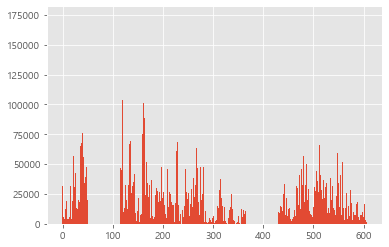

In [55]:
import matplotlib.pyplot as plt

plt.bar(range(len(result)), result)
plt.show()

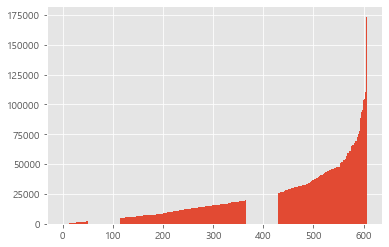

<Figure size 720x360 with 0 Axes>

In [60]:
# 오름차순 정렬
import matplotlib.pyplot as plt

result.sort() # 오름차순 정렬
plt.bar(range(len(result)), result)
plt.show()

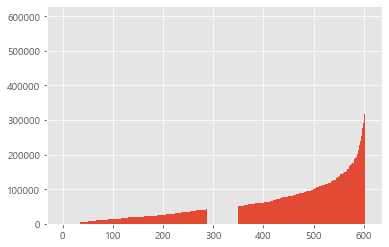

In [62]:
# 아침 7시~9시 승차인원
import csv
import matplotlib.pyplot as plt

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))

result.sort()
plt.bar(range(len(result)), result)
plt.show()

In [67]:
# 아침 7시~9시 승차인원 최대역 찾기
import csv
import matplotlib.pyplot as plt

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
mx2 = 0
mx_station2 = ''

for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = row[3] + '('+row[1] + ')'
    
    if sum(row[11:16:2]) > mx2:
        mx2 = sum(row[11:16:2])
        mx_station2 = row[3] + '('+row[1] + ')'

print('승차 인원 최대:', mx_station, mx)
print('하차 인원 최대:',mx_station2, mx2)

승차 인원 최대: 신림(2호선) 598564
하차 인원 최대: 강남(2호선) 673827


In [70]:
# 밤 11시 인원 최대역 찾기
import csv

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('time'))

for row in data:
    row[4:] = map(int, row[4:])
    a = row[4 + (t-4)*2]
    if a > mx:
        mx = a
        mx_station = row[3] + '('+row[1] + ')'

print(f'{t}시 인원 최대역:', mx_station, mx)

23시 인원 최대역: 강남(2호선) 12509


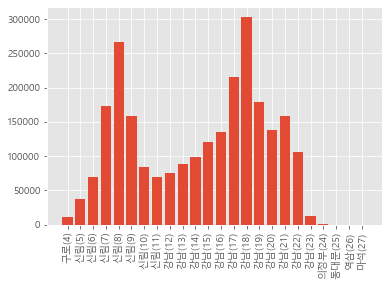

In [72]:
# 시간대별 인원 최대역 찾기
import csv
import matplotlib.pyplot as plt

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
mx = [0]*24
mx_station = ['']*24

for row in data:
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2 + 4]
        if a > mx[j]:
            mx[j] = a
            mx_station[j] = row[3] + '('+str(j+4) + ')'

plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

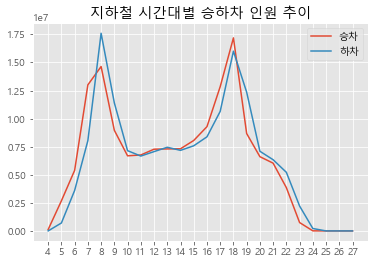

In [86]:
# 시간대별 인원
import csv
import matplotlib.pyplot as plt

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
s_in = [0]*24   # 승차
s_out = [0]*24  # 하차

for row in data:
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] += row[4 + i*2]
        s_out[i] += row[5 + i*2]

plt.plot(range(4, 28), s_in, label='승차')
plt.plot(range(4, 28), s_out, label='하차')
plt.xticks(range(4, 28))
plt.title('지하철 시간대별 승하차 인원 추이')
plt.legend()
plt.show()

In [103]:
# 시간대별 인원
import csv
import matplotlib.pyplot as plt

f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)

name1 = input('station?')
name2 = ''
a = [0]*24
b = [0]*24
c = [0]*24
d = [0]*24

for row in data:
    row[4:] = map(int, row[4:])
    if name1 == row[3]:
        for i in range(24):
            a[i] = row[4 + i*2]
            b[i] = row[5 + i*2]


# plt.plot(range(4, 28), a, label='승차')
# plt.plot(range(4, 28), b, label='하차')
# plt.xticks(range(4, 28))
# plt.title(f'{name} 지하철 시간대별 승하차 인원 추이')
# plt.legend()
# plt.show()

In [ ]:
f = open('data/subwaytime.csv', encoding='utf8')
data = csv.reader(f)
next(data)
next(data)
c = [[0]*24]*602
d = [[0]*24]*602

for row in data:
    row[4:] = map(int, row[4:])
    print(row)
    # for j in range(24):
        # for i in range(602):
        #     c[i][j] = row[4 + j*2]
        #     d[i][j] = row[5 + j*2]
        
        # while abs(c[j] - a[j]) < 100 and  abs(d[j] - b[j]) < 100:
        #     name2 = row[3]
            
c